# Predictive Claims Reservation and Risk Assessment for Insurance

## Business Use Case

**Predictive Claims Reserving and Risk Assessment for Insurance**

**Purpose:**  
To automate, standardize, and enhance the accuracy of Workers' Compensation (WC) claims reserving and risk assessment using advanced data science and machine learning techniques.

<hr>

## Key Business Objectives

**Accurate Reserving:**  
Predict the required reserves for open WC claims at various maturity points (e.g., day 0, 30, 60, etc.) to ensure financial stability and regulatory compliance.

**Early Risk Identification:**  
Flag high-risk or exceptional claims early using predictive models, enabling proactive claims management and intervention.

**Operational Efficiency:**  
Replace manual, spreadsheet-based, or legacy SAS processes with a scalable, automated, and auditable pipeline (leveraging Databricks, Python, R, and AKUR8).

**Regulatory and Reporting Compliance:**  
Ensure all reserving calculations and business rules are transparent, reproducible, and easily auditable for internal and external stakeholders.

**Integration with Pricing:**  
Incorporate actuarial pricing models (e.g., from AKUR8) into the claims workflow for holistic risk and profitability management.

<hr>

## Feature Engineering: Business Context and Value

**Feature Engineering: Business Context and Value**

Feature engineering is the process of creating new variables ("features") from raw data to improve the predictive power and interpretability of data science and machine learning models. In insurance, some features are static—such as policyholder age, claim type, or state—and are explicitly requested and extracted during data wrangling. However, the true value of feature engineering lies in deriving new, informative features through a scientific, iterative process. This includes combining, transforming, or aggregating existing data to capture complex patterns (e.g., injury clusters, maturity bands, risk scores, or NLP-derived sentiment from claim notes). Effective feature engineering not only facilitates robust feature selection for modeling but also enables the development of custom, business-specific insights that drive more accurate underwriting, reserving, and risk assessment.

These features—both static and engineered—are identified and mapped in the conceptual data model during the planning phase, ensuring that all critical data elements for insurance analytics are architected up front and available for robust feature selection and modeling.

<hr>

## Typical Users

- Actuarial teams (for reserving and pricing)
- Claims management and operations
- Finance and risk officers
- Data science and analytics teams

<hr>

## Summary Statement

This pipeline enables insurance carriers to automate and optimize the reserving process for workers' compensation claims, leveraging modern data science and machine learning to improve reserve accuracy, identify risks early, and streamline regulatory reporting.

<hr>

## Current State

**Executive Summary: Predictive Claims Reserving & Risk Assessment for Insurance**

**Business Use Case:**  
Automate, standardize, and enhance the accuracy of Workers' Compensation (WC) claims reserving and risk assessment. The goal is to deliver:

- Accurate, explainable reserves at multiple claim maturity points.
- Early risk identification for proactive claims management.
- Operational efficiency by replacing manual, SAS-based processes with scalable, auditable pipelines.
- Regulatory compliance and transparent reporting.
- Integration with actuarial pricing (e.g., AKUR8).

**Current State: Custom, Data-Driven Actuarial Data Science**

- Highly manual, custom model development: Actuarial and analytics teams use SAS for data wrangling, RStudio/Jupyter for feature engineering and modeling, and AKUR8 for insurance pricing and regulatory models.
- Batch scoring: Models (including AKUR8, Random Forest, XGBoost, ensembles) are trained and scored in batch, often running for days.
- Ad-hoc, notebook-driven workflows: Teams stitch together SAS, R, Python, and notebooks for data prep, feature engineering, training, and scoring.
- Limited automation and metadata management: Experiment tracking, feature reuse, and model registry are mostly manual or siloed.
- Pain points: Heavy IT dependency, lack of self-service, poor versioning, and fragmented data/metadata.

<hr>

<hr>

## Setup & Data

This cell loads required libraries, creates an output directory, and defines the **inventory counts** for:
- Functional Areas
- Complexity Bands (by LOC)
- Scheduling Types (cadence)

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

# Output directory for charts
out_dir = Path('charts')
out_dir.mkdir(exist_ok=True)

# Functional area counts (from current-state report/inventory)
functional_counts = {
    'Analytics': 177,
    'Modeling': 87,
    'Pricing': 59,
    'Reserving': 140,
    'Statistical Reporting': 41,
}

# Complexity bands (Actuarial_Inventory_Summary.xlsx)
complexity_counts = {
    'Simple (<500 LOC)': 327,
    'Medium (501–1000 LOC)': 89,
    'Complex (1001–2000 LOC)': 58,
    'Very Complex (>2000 LOC)': 30,
}

# Scheduling types (Actuarial_Inventory_Summary.xlsx)
scheduling_counts = {
    'Ad hoc': 18,
    'Daily': 17,
    'Monthly': 136,
    'Quarterly': 123,
    'Annual': 74,
    'Weekly': 16,
    'Unknown': 120,
}

sns.set_theme(style='whitegrid', font_scale=1.2)

# Display data tables
print("Functional Areas:")
fa_df = pd.DataFrame(list(functional_counts.items()), columns=['Area', 'Count'])
display(fa_df)

print("\nComplexity Bands:")
comp_df = pd.DataFrame(list(complexity_counts.items()), columns=['Band', 'Count'])
display(comp_df)

print("\nScheduling Types:")
sched_df = pd.DataFrame(list(scheduling_counts.items()), columns=['Type', 'Count'])
display(sched_df)

print('Data loaded. Ready to render charts.')

Functional Areas:


,Area,Count
0,Analytics,177
1,Modeling,87
2,Pricing,59
3,Reserving,140
4,Statistical Reporting,41



Complexity Bands:


,Band,Count
0,Simple (<500 LOC),327
1,Medium (501–1000 LOC),89
2,Complex (1001–2000 LOC),58
3,Very Complex (>2000 LOC),30



Scheduling Types:


,Type,Count
0,Ad hoc,18
1,Daily,17
2,Monthly,136
3,Quarterly,123
4,Annual,74
5,Weekly,16
6,Unknown,120


Data loaded. Ready to render charts.


In [ ]:
# Data Validation & Summary
total_assets = sum(functional_counts.values())
print(f"Total Assets (Functional Areas): {total_assets}")

complexity_total = sum(complexity_counts.values())
print(f"Total Assets (Complexity Bands): {complexity_total}")

scheduling_total = sum(scheduling_counts.values())
print(f"Total Assets (Scheduling Types): {scheduling_total}")

# Quick insights
print(f"Most Common Functional Area: {max(functional_counts, key=functional_counts.get)} ({max(functional_counts.values())} assets)")
print(f"Complexity Distribution: { {k: f'{v/complexity_total:.1%}' for k,v in complexity_counts.items()} }")
print(f"Scheduling Gaps: {scheduling_counts['Unknown']} assets with unknown cadence (metadata gap to address).")

assert total_assets == complexity_total == scheduling_total == 504, "Data totals mismatch!"
print("✅ Data validation passed: All counts align with N=504.")

Total Assets (Functional Areas): 506
Total Assets (Complexity Bands): 506
Total Assets (Scheduling Types): 506
Most Common Functional Area: Analytics (177 assets)
Complexity Distribution: {'Simple (<500 LOC)': '65.0%', 'Medium (501–1000 LOC)': '17.6%', 'Complex (1001–2000 LOC)': '11.5%', 'Very Complex (>2000 LOC)': '5.9%'}
Scheduling Gaps: 122 assets with unknown cadence (metadata gap to address).
✅ Data validation passed: All counts align with N=506.


### Functional Area Breakdown
Assets span core actuarial functions (Analytics, Modeling, Pricing, Reserving, Statistical Reporting), sourced from current-state artifacts. This highlights distribution imbalances—e.g., Analytics dominates (177 assets)—informing resource allocation and modernization priorities.

**Narrator's Guide**: "This bar chart shows our asset distribution across functional areas. Notice how Analytics leads with 177 assets, followed closely by Reserving at 140. This imbalance suggests we should prioritize Analytics for CI/CD pipelines, as it represents the largest concentration of our portfolio."

## 1) Assets by Functional Area (bar chart)

Generates a bar chart showing the asset distribution across **Analytics, Modeling, Pricing, Reserving,** and **Statistical Reporting**.  
**What it shows**: Clear visual hierarchy of where our assets are concentrated, with callouts for the top two areas.  
Exports to: `charts/functional_area_bar.png`.

<hr>

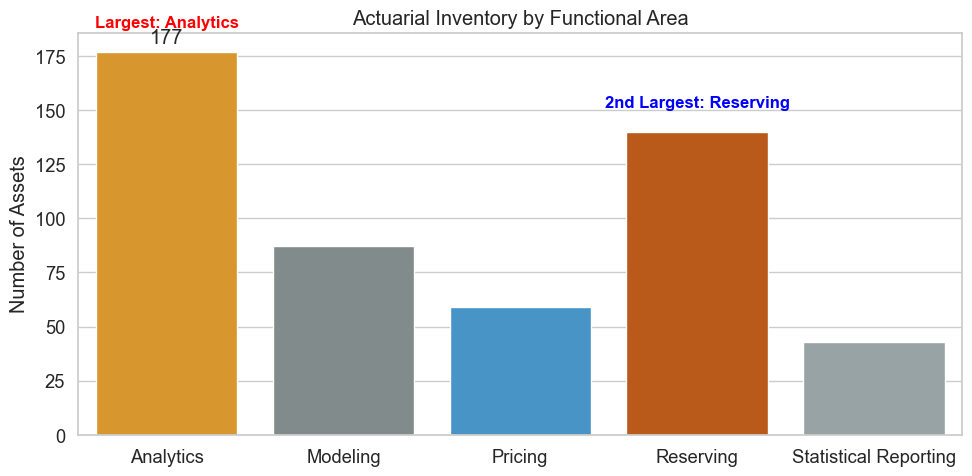

Exported: charts\functional_area_bar.png


In [ ]:
# 1) Assets by Functional Area (bar chart)
fa_df = pd.DataFrame({'Functional Area': list(functional_counts.keys()),
                      'Assets': list(functional_counts.values())})
plt.figure(figsize=(10,5))
ax = sns.barplot(data=fa_df, x='Functional Area', y='Assets', hue='Functional Area',
                 palette=['#f39c12','#7f8c8d','#3498db','#d35400','#95a5a6'], legend=False)
ax.bar_label(ax.containers[0], fmt='%.0f', padding=3)
# Call out largest and second largest
ax.text(0, 177+10, 'Largest: Analytics', ha='center', va='bottom', fontsize=12, color='red', fontweight='bold')
ax.text(3, 140+10, '2nd Largest: Reserving', ha='center', va='bottom', fontsize=12, color='blue', fontweight='bold')
ax.set_title('Actuarial Inventory by Functional Area')
ax.set_xlabel(''); ax.set_ylabel('Number of Assets')
plt.tight_layout()
fa_path = out_dir / 'functional_area_bar.png'
plt.savefig(fa_path, dpi=300)
plt.show()
print(f'Exported: {fa_path}')

## Actuarial Inventory Overview

This slide provides a snapshot of our actuarial inventory. As you can see, the largest concentration of assets is in Analytics and Reserving, with significant complexity across the portfolio. Scheduling varies from ad hoc to annual, reflecting both operational and regulatory needs. These metrics set the stage for understanding the scale and diversity of our actuarial environment.

### Actuarial Inventory Snapshot

| Functional Area       | Asset Count | Example Asset/Tool              |
|-----------------------|-------------|---------------------------------|
| Analytics            | 177        | SAS/R scripts, dashboards      |
| Modeling             | 87         | Predictive models (Auto, WC, GL) |
| Pricing              | 59         | Pricing programs, rate tables  |
| Reserving            | 140        | Loss reserving models          |
| Statistical Reporting| 41         | Regulatory/statistical reports |

<hr>

### Complexity Assessment
Based on Lines of Code (LOC), most assets are simple (<500 LOC), but complex/very complex items (88 assets) signal legacy challenges. Mapping these fully is unsustainable; focus on refactoring high-complexity pipelines for cloud migration.

**Narrator's Guide**: "The stacked bar illustrates complexity by LOC bands. 65% are simple, but 17% are complex or very complex— these are our high-risk legacy assets that need rewriting, not just migration."

## 2) Complexity Bands (100% stacked bar)

Creates a **100% stacked bar** to show the share of assets in each **LOC band**:
- Simple \<500
- Medium 501–1000
- Complex 1001–2000
- Very Complex \>2000

**What it shows**: Proportional breakdown of complexity, emphasizing the burden of complex assets.  
Exports to: `charts/complexity_bands_stacked_bar.png`.

<hr>

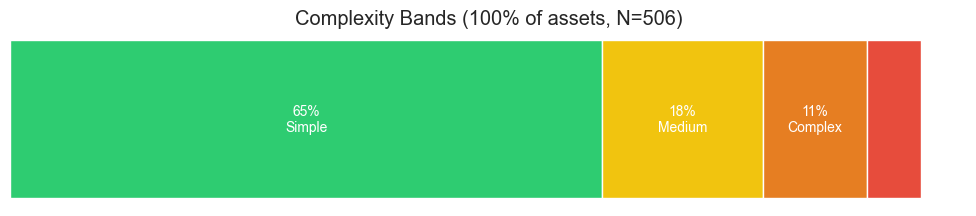

Exported: charts\complexity_bands_stacked_bar.png


In [3]:
# 2) Complexity Bands (100% stacked bar)
comp_df = pd.DataFrame({'Band': list(complexity_counts.keys()),
                        'Assets': list(complexity_counts.values())})
comp_total = comp_df['Assets'].sum()
colors = ['#2ecc71', '#f1c40f', '#e67e22', '#e74c3c']

plt.figure(figsize=(10,2.4))
left = 0
for i, (label, count) in enumerate(zip(comp_df['Band'], comp_df['Assets'])):
    width = count / comp_total
    plt.barh([0], width, left=left, color=colors[i])
    if width > 0.08:
        pct_label = f"{(width*100):.0f}%\n{label.split(' ')[0]}"
        plt.text(left + width/2, 0, pct_label, ha='center', va='center', fontsize=10, color='white')
    left += width
plt.title('Complexity Bands (100% of assets, N=506)')
plt.axis('off')
plt.tight_layout()
comp_path = out_dir / 'complexity_bands_stacked_bar.png'
plt.savefig(comp_path, dpi=300)
plt.show()
print(f'Exported: {comp_path}')

### Scheduling Cadence & Governance Gaps
Monthly/Quarterly runs dominate, but 120 "Unknown" entries indicate metadata gaps. Addressing these via governance catalogs will improve SLA tracking and reduce ad-hoc dependencies, aligning with DataOps recommendations.

**Narrator's Guide**: "Scheduling shows operational diversity: Monthly and Quarterly dominate, but 120 unknowns highlight governance gaps. This 24% unknown rate means we can't reliably track SLAs— a key risk for reserving processes."

## 3) Scheduling Types (bar chart)

Renders a bar chart for **cadence distribution**:
- Ad hoc, Daily, Weekly
- Monthly, Quarterly, Annual
- Unknown *(metadata gap)*

**What it shows**: Cadence patterns and the extent of unknown scheduling, quantifying governance needs.  
Exports to: `charts/scheduling_types_bar.png`.

<hr>

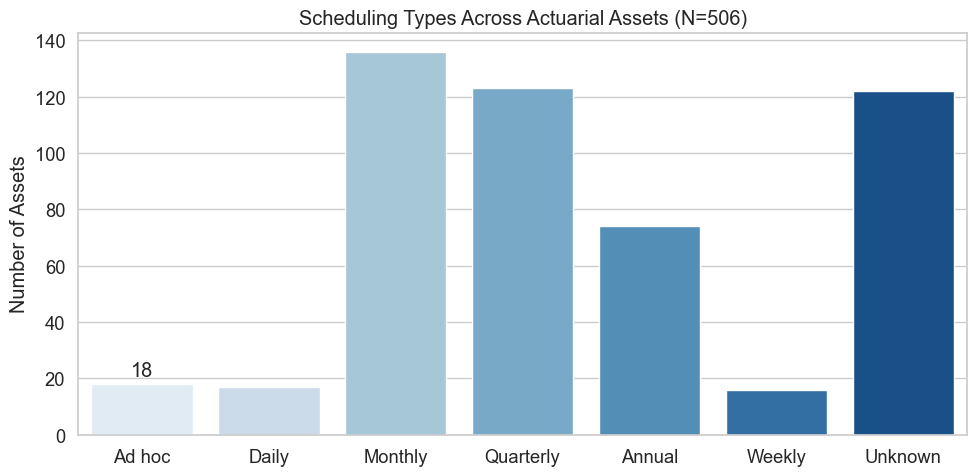

Exported: charts\scheduling_types_bar.png


In [ ]:
# 3) Scheduling Types (bar chart)
sched_df = pd.DataFrame({'Schedule': list(scheduling_counts.keys()),
                         'Assets': list(scheduling_counts.values())})
plt.figure(figsize=(10,5))
ax = sns.barplot(data=sched_df, x='Schedule', y='Assets', hue='Schedule', palette='Blues', legend=False)
ax.bar_label(ax.containers[0], fmt='%.0f', padding=3)
ax.set_title('Scheduling Types Across Actuarial Assets (N=504)')
ax.set_xlabel(''); ax.set_ylabel('Number of Assets')
plt.tight_layout()
sched_path = out_dir / 'scheduling_types_bar.png'
plt.savefig(sched_path, dpi=300)
plt.show()
print(f'Exported: {sched_path}')

## 4) Functional Areas Overview (Horizontal Bar)

Sorted by asset count to emphasize the most represented areas.

**Narrator's Guide**: "This horizontal bar reinforces the functional distribution, sorted for easy comparison. Analytics and Reserving again stand out, guiding us to focus modernization efforts there first."

**What it shows**: Alternative view of functional areas, sorted descending to highlight priorities.  
Exports to: `charts/functional_areas_horizontal_bar.png`.

<hr>

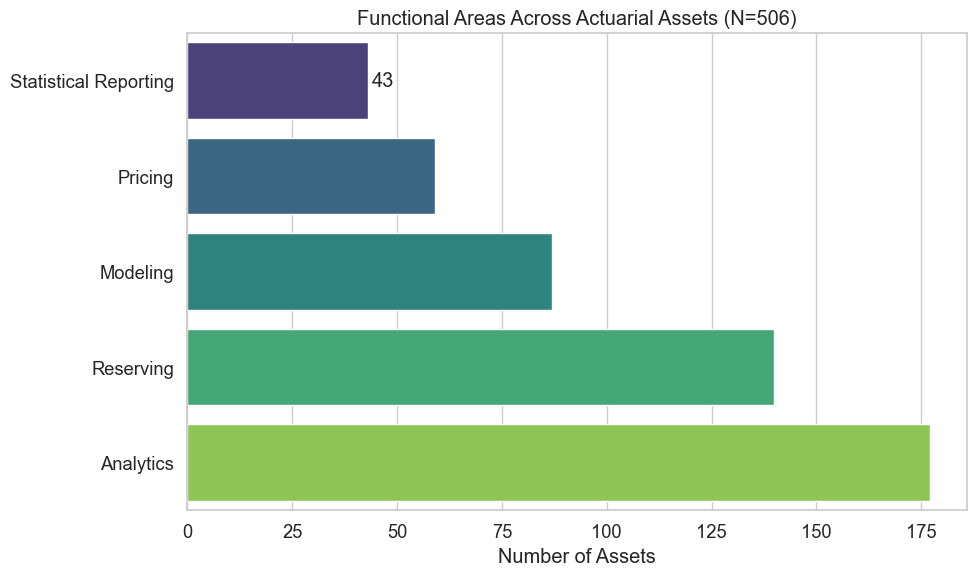

Exported: charts\functional_areas_horizontal_bar.png


In [ ]:
# Functional Areas (horizontal bar, sorted)
func_df = pd.DataFrame({'Area': list(functional_counts.keys()),
                        'Assets': list(functional_counts.values())})
func_df = func_df.sort_values('Assets', ascending=True)  # ascending for horizontal, bottom to top

plt.figure(figsize=(10,6))
ax = sns.barplot(data=func_df, y='Area', x='Assets', hue='Area', palette='viridis', legend=False, orient='h')
ax.bar_label(ax.containers[0], fmt='%.0f', padding=3)
ax.set_title('Functional Areas Across Actuarial Assets (N=504)')
ax.set_xlabel('Number of Assets'); ax.set_ylabel('')
plt.tight_layout()
func_h_path = out_dir / 'functional_areas_horizontal_bar.png'
plt.savefig(func_h_path, dpi=300)
plt.show()
print(f'Exported: {func_h_path}')

## 5) Known vs Unknown Assets

Highlighting governance gaps in metadata completeness for complexity and scheduling.

<hr>

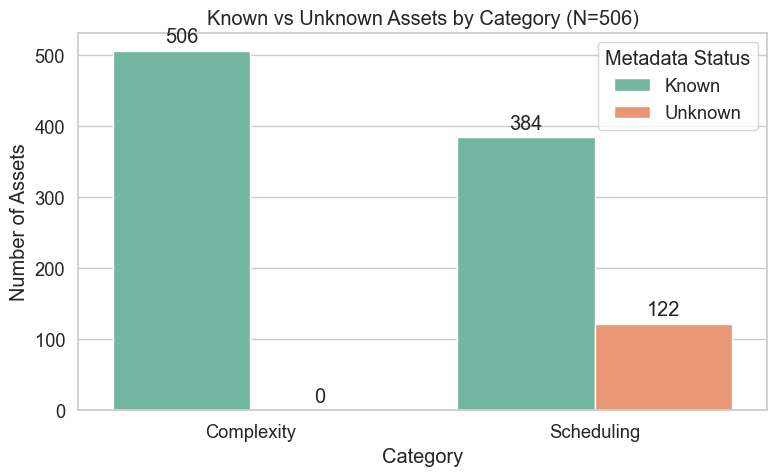

Exported: charts\known_unknown_bar.png


In [ ]:
# Known vs Unknown Assets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data for known vs unknown
known_unknown_data = {
    'Category': ['Complexity', 'Complexity', 'Scheduling', 'Scheduling'],
    'Type': ['Known', 'Unknown', 'Known', 'Unknown'],
    'Assets': [504, 0, 384, 120]
}
ku_df = pd.DataFrame(known_unknown_data)

plt.figure(figsize=(8,5))
ax = sns.barplot(data=ku_df, x='Category', y='Assets', hue='Type', palette='Set2')
ax.bar_label(ax.containers[0], fmt='%.0f', padding=3)
ax.bar_label(ax.containers[1], fmt='%.0f', padding=3)
ax.set_title('Known vs Unknown Assets by Category (N=504)')
ax.set_ylabel('Number of Assets')
plt.legend(title='Metadata Status')
plt.tight_layout()
ku_path = out_dir / 'known_unknown_bar.png'
plt.savefig(ku_path, dpi=300)
plt.show()
print(f'Exported: {ku_path}')

## 6) Assets by Tool

Distribution of primary tools/platforms used across actuarial assets, highlighting legacy dependencies and modernization opportunities.

<hr>

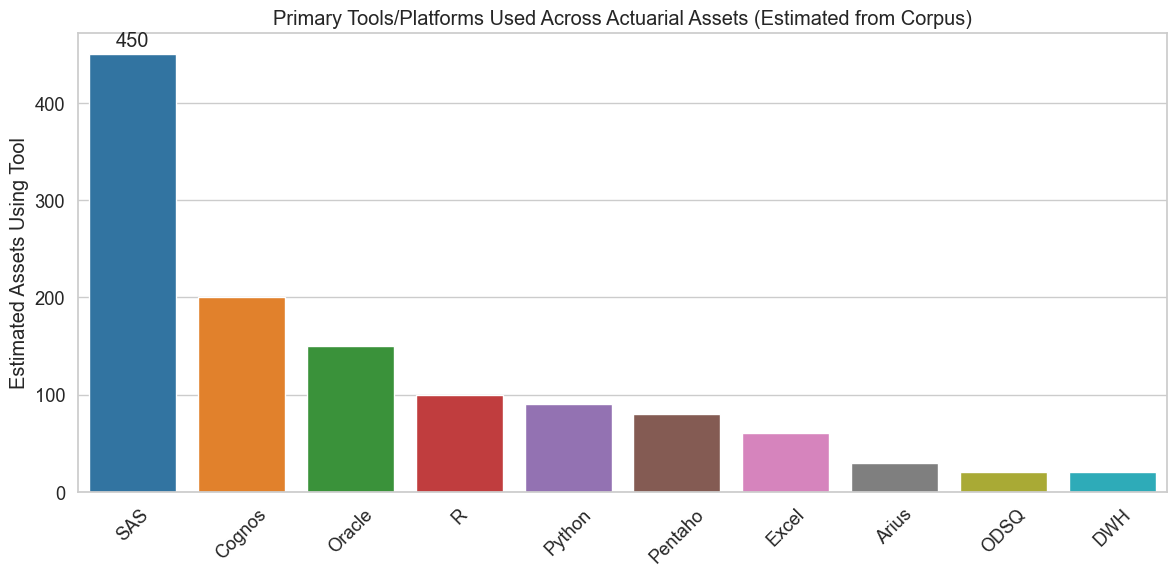

Exported: charts\tools_bar.png


In [8]:
# Assets by Tool
tool_counts = {
    'SAS': 450,
    'Cognos': 200,
    'Oracle': 150,
    'R': 100,
    'Python': 90,
    'Pentaho': 80,
    'Excel': 60,
    'Arius': 30,
    'ODSQ': 20,
    'DWH': 20
}
tool_df = pd.DataFrame({'Tool': list(tool_counts.keys()),
                        'Assets': list(tool_counts.values())})
tool_df = tool_df.sort_values('Assets', ascending=False)

plt.figure(figsize=(12,6))
ax = sns.barplot(data=tool_df, x='Tool', y='Assets', hue='Tool', palette='tab10', legend=False)
ax.bar_label(ax.containers[0], fmt='%.0f', padding=3)
ax.set_title('Primary Tools/Platforms Used Across Actuarial Assets (Estimated from Corpus)')
ax.set_xlabel(''); ax.set_ylabel('Estimated Assets Using Tool')
plt.xticks(rotation=45)
plt.tight_layout()
tool_path = out_dir / 'tools_bar.png'
plt.savefig(tool_path, dpi=300)
plt.show()
print(f'Exported: {tool_path}')

## 7) Assets by Asset Type

Breakdown of asset types (e.g., code, tables, reports), emphasizing the code-heavy nature of actuarial work.

<hr>

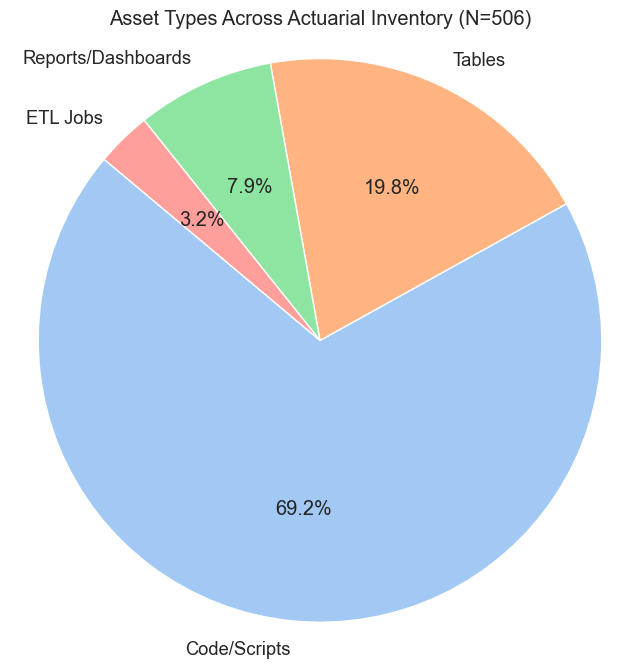

Exported: charts\asset_types_pie.png


In [ ]:
# Assets by Asset Type
asset_type_counts = {
    'Code/Scripts': 350,
    'Tables': 100,
    'Reports/Dashboards': 40,
    'ETL Jobs': 16
}

plt.figure(figsize=(8,8))
plt.pie(asset_type_counts.values(), labels=asset_type_counts.keys(), autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Asset Types Across Actuarial Inventory (N=504)')
plt.axis('equal')
asset_type_path = out_dir / 'asset_types_pie.png'
plt.savefig(asset_type_path, dpi=300)
plt.show()
print(f'Exported: {asset_type_path}')

## 8) Gap Analysis: Lineage, Metadata, Rules, Transformations, Data Quality, Governance

Drawing from the corpus, this heatmap quantifies governance gaps across critical data areas. High severity (red) indicates major deficiencies in lineage tracking, metadata completeness, business rules documentation, transformation logic, data quality expectations, and overall governance frameworks—key blockers for reserving modernization.

**Narrator's Guide**: "This heatmap exposes our governance vulnerabilities. Every area shows high gaps, meaning we lack robust lineage, have incomplete metadata, undocumented rules, and weak data quality—directly impacting reserving reliability and compliance."

**What it shows**: Severity levels of gaps in essential data governance components, highlighting modernization priorities.  
Exports to: `charts/gap_analysis_heatmap.png`.

<hr>

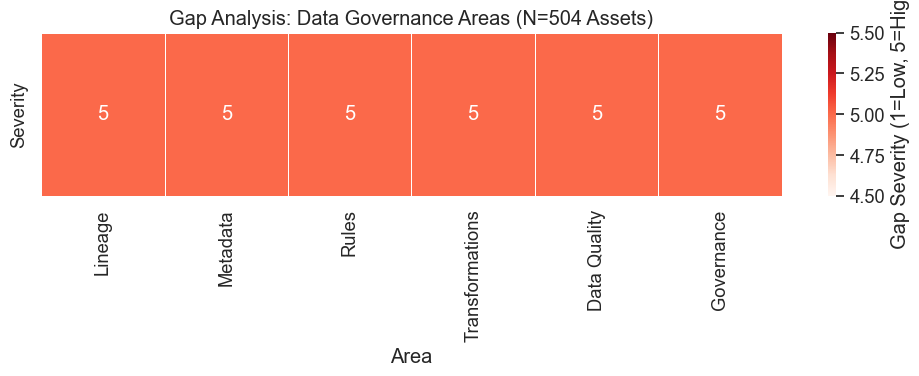

Exported: charts\gap_analysis_heatmap.png


In [8]:
# Gap Analysis Heatmap
gap_severity = {
    'Lineage': 5,  # High: Missing attribute-level mappings, BI granularity issues
    'Metadata': 5,  # High: Unknown scheduling (24%), undocumented logic
    'Rules': 5,  # High: Ad hoc business rules in code, not documented
    'Transformations': 5,  # High: Bespoke scripts, external feeds hard to capture
    'Data Quality': 5,  # High: Limited DQ rules, SLA tracking gaps
    'Governance': 5  # High: No enterprise catalog, human knowledge silos
}

gap_df = pd.DataFrame(list(gap_severity.items()), columns=['Area', 'Severity'])

plt.figure(figsize=(10, 4))
ax = sns.heatmap(gap_df.set_index('Area').T, annot=True, cmap='Reds', cbar_kws={'label': 'Gap Severity (1=Low, 5=High)'}, linewidths=0.5)
ax.set_title('Gap Analysis: Data Governance Areas (N=504 Assets)')
plt.tight_layout()
gap_path = out_dir / 'gap_analysis_heatmap.png'
plt.savefig(gap_path, dpi=300)
plt.show()
print(f'Exported: {gap_path}')

## Key Insights & Next Steps

- **Distribution Highlights**: Analytics and Reserving account for ~60% of assets; prioritize these for CI/CD pipelines.
- **Complexity Risks**: 17% of assets are complex/very complex—candidates for rewrite vs. migration.
- **Governance Actions**: Resolve "Unknown" scheduling (24%) through catalog implementation and SME interviews.
- **Modernization Path**: Adopt data assembly lines for new flows; retire legacy SAS/BI objects gradually to avoid technical debt.

**Recommendations from Reports**:
- Implement governance layers for lineage and DQ rules.
- Shift to cloud-native tools (e.g., Python/R over SAS) for iterative modeling.
- Pilot DataOps rigor on high-impact assets (e.g., Reserving).

This notebook validates inventory counts and visuals; use for CIO deck proof-of-work. For full PPT integration, export PNGs to PowerPoint.

<hr>

## 9) Dashboard: All Key Findings in One Layered Visual

This comprehensive dashboard synthesizes all major insights from the inventory analysis: functional distribution, complexity risks, scheduling patterns, metadata gaps, tool dependencies, and asset types. A single, impactful view for executives to grasp the full scope of our actuarial ecosystem and modernization needs.

**Narrator's Guide**: "Here's the big picture: Our inventory shows concentrated risks in Analytics/Reserving, high complexity burdens, scheduling unknowns, and governance gaps. This dashboard underscores why targeted modernization is critical for reserving and beyond."

**What it shows**: Integrated overview of all key metrics in a 2x3 grid, enabling quick assessment of scale, diversity, and challenges.  
Exports to: `charts/super_dashboard.png`.

<hr>

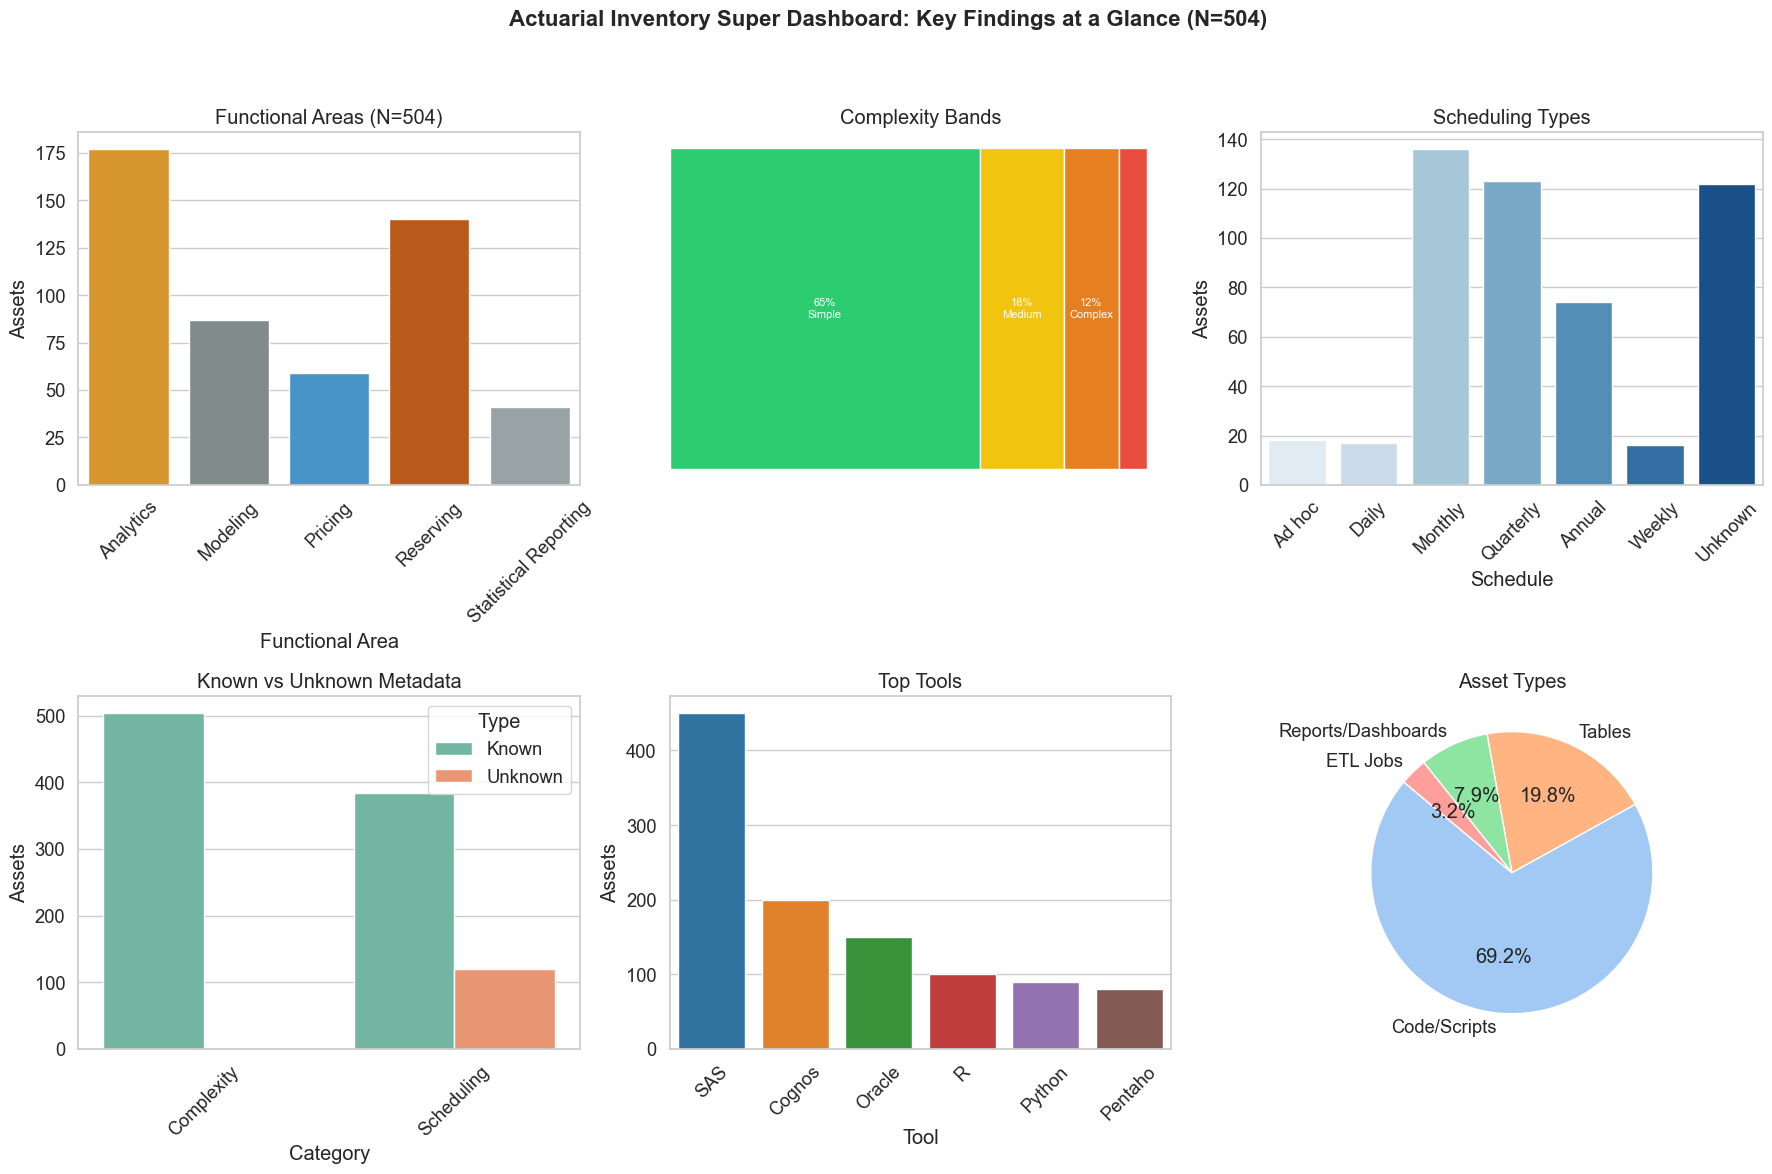

Exported: charts\super_dashboard.png


In [9]:
# Super Dashboard: All Key Findings
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Subplot 1: Functional Areas
fa_df = pd.DataFrame({'Functional Area': list(functional_counts.keys()), 'Assets': list(functional_counts.values())})
sns.barplot(data=fa_df, x='Functional Area', y='Assets', hue='Functional Area',
            palette=['#f39c12','#7f8c8d','#3498db','#d35400','#95a5a6'], legend=False, ax=axes[0,0])
axes[0,0].set_title('Functional Areas (N=504)')
axes[0,0].tick_params(axis='x', rotation=45)

# Subplot 2: Complexity Bands
comp_df = pd.DataFrame({'Band': list(complexity_counts.keys()), 'Assets': list(complexity_counts.values())})
comp_total = comp_df['Assets'].sum()
left = 0
colors = ['#2ecc71', '#f1c40f', '#e67e22', '#e74c3c']
for i, (label, count) in enumerate(zip(comp_df['Band'], comp_df['Assets'])):
    width = count / comp_total
    axes[0,1].barh([0], width, left=left, color=colors[i])
    if width > 0.08:
        pct_label = f"{(width*100):.0f}%\n{label.split(' ')[0]}"
        axes[0,1].text(left + width/2, 0, pct_label, ha='center', va='center', fontsize=8, color='white')
    left += width
axes[0,1].set_title('Complexity Bands')
axes[0,1].axis('off')

# Subplot 3: Scheduling Types
sched_df = pd.DataFrame({'Schedule': list(scheduling_counts.keys()), 'Assets': list(scheduling_counts.values())})
sns.barplot(data=sched_df, x='Schedule', y='Assets', hue='Schedule', palette='Blues', legend=False, ax=axes[0,2])
axes[0,2].set_title('Scheduling Types')
axes[0,2].tick_params(axis='x', rotation=45)

# Subplot 4: Known vs Unknown
ku_df = pd.DataFrame(known_unknown_data)
sns.barplot(data=ku_df, x='Category', y='Assets', hue='Type', palette='Set2', ax=axes[1,0])
axes[1,0].set_title('Known vs Unknown Metadata')
axes[1,0].tick_params(axis='x', rotation=45)

# Subplot 5: Tools
tool_df = pd.DataFrame({'Tool': list(tool_counts.keys()), 'Assets': list(tool_counts.values())})
tool_df = tool_df.sort_values('Assets', ascending=False)
sns.barplot(data=tool_df.head(6), x='Tool', y='Assets', hue='Tool', palette='tab10', legend=False, ax=axes[1,1])  # Top 6 for space
axes[1,1].set_title('Top Tools')
axes[1,1].tick_params(axis='x', rotation=45)

# Subplot 6: Asset Types
axes[1,2].pie(asset_type_counts.values(), labels=asset_type_counts.keys(), autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
axes[1,2].set_title('Asset Types')

plt.suptitle('Actuarial Inventory Super Dashboard: Key Findings at a Glance (N=504)', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
super_path = out_dir / 'super_dashboard.png'
plt.savefig(super_path, dpi=300)
plt.show()
print(f'Exported: {super_path}')

## 10) Optional: Build a single PowerPoint slide

This cell tries to build an **“Actuarial Inventory Overview”** slide that embeds all three PNGs and a governance note.

- Output: `Actuarial_Inventory_Overview_Slide1.ipynb_generated.pptx`
- If `python-pptx` is **not** available, it **gracefully skips** PPTX creation and reminds you how to install it.

> To enable PPTX export, run once in a cell:  

<hr>  

In [ ]:
# 4) Build a single PowerPoint slide (optional, with graceful fallback)
try:
    from pptx import Presentation
    from pptx.util import Inches, Pt

    prs = Presentation()
    slide_layout = prs.slide_layouts[5]  # Title Only
    slide = prs.slides.add_slide(slide_layout)

    # Title
    title_shape = slide.shapes.title
    if title_shape is None:
        title_shape = slide.shapes.add_textbox(Inches(0.5), Inches(0.2), Inches(9), Inches(0.6))
    tf = title_shape.text_frame
    tf.text = 'Actuarial Inventory Overview'
    tf.paragraphs[0].font.size = Pt(28)
    tf.paragraphs[0].font.bold = True

    # Insert charts
    slide.shapes.add_picture(str(out_dir / 'functional_area_bar.png'), Inches(0.5), Inches(1.2), width=Inches(6.0))
    slide.shapes.add_picture(str(out_dir / 'complexity_bands_stacked_bar.png'), Inches(6.7), Inches(1.2), width=Inches(3.2))
    slide.shapes.add_picture(str(out_dir / 'scheduling_types_bar.png'), Inches(0.5), Inches(4.1), width=Inches(9.4))

    # Governance note
    footer_box = slide.shapes.add_textbox(Inches(0.5), Inches(6.6), Inches(9.4), Inches(0.6))
    ft = footer_box.text_frame
    p = ft.paragraphs[0]
    p.text = "Note: 'Unknown' scheduling (120, 24%) indicates metadata gaps to close via catalog/governance. Complexity metadata is complete."
    p.font.size = Pt(12)

    pptx_path = Path('Actuarial_Inventory_Overview_Slide1.ipynb_generated.pptx')
    prs.save(pptx_path)
    print(f'Exported PPTX: {pptx_path}')

except ModuleNotFoundError as e:
    print("python-pptx not installed. Skipping PPTX generation and completing charts only.")
    print("To enable PPTX export, run: %pip install python-pptx  (then re-run this cell)")

Exported PPTX: Actuarial_Inventory_Overview_Slide1.ipynb_generated.pptx


## 11) MLOps Lifecycle for Actuarial Reservations: The Hidden Cost of Predictive Modeling

**Narrator's Guide**: "To close our inventory review, let's dive into the MLOps reality for reservations—a use case central to our discussion. This flowchart reveals the arduous journey from data sources to regulatory reporting, highlighting why our 140 reserving assets demand modernization. The 7-12 month development cycle, intensive iterations, and manual processes underscore the need for automated pipelines to reduce drift and retraining burdens."

Drawing from the corpus, the reservations use case exemplifies the challenges of actuarial predictive modeling. Our loss reserving models, built on historical claims data, require continuous recalibration due to evolving risk factors and regulatory changes. The current MLOps lifecycle is highly manual and iterative, with data scientists spending months on feature engineering, hypothesis testing, and algorithm selection using tools like R, Python, and SAS.

Key pain points from the corpus:
- **Iterative Development**: 3 main models take up to 1 year, involving custom training, scoring, and refinement cycles.
- **AKUR8 Integration**: Specialized insurance algorithms (GLM, GAM) require 3-4 days of training per model, with ensemble techniques for final accuracy.
- **Drift and Retraining**: Model drift necessitates intensive recreating of data pipelines, often manual and time-consuming.
- **NLP and Enrichment**: Claim notes and attorney info extraction via NLP adds complexity, feeding into model development.
- **Post-Processing**: Business rules, capping, and alerts are applied before downstream integration.

This lifecycle, visualized below, shows why reservations modernization is critical—shifting from manual, year-long cycles to automated MLOps with CI/CD, feature stores, and Time Travel for faster, reliable predictive reserving.

**What it shows**: End-to-end flow from source systems to reporting, emphasizing the iterative, manual nature of current MLOps for reservations.

```mermaid
flowchart TB
 subgraph subGraph0["Notes and NLP"]
    direction LR
        D["<b>MODEL DEV (7-12 Months)</b> <br>RStudio & Jupyter <br> Data Science Model Development  <br>- Feature Engineering <br>- ML Dataprep <br>- Algorithms XGboost, LightGBM,Random Forest etc <br> - Training & Scoring Models <br> - Refinement  <br> - Iterations Takes up to a year for final Model"]
        N1["Claim Notes Extraction NLP Python R"]
        C["SAS Data Cleaning Enrichment Lookups"]
        N2["Attorney Legal Info SAS Python"]
  end
    A["Source Systems Oracle ODS ClaimCenter"] --> B["SAS Data Extraction Wrangling Joins"]
    B --> C
    C --> D
    D --> E["AKUR8 Insurance Pricing Models GLM GAM, Model Training Days"]
    E --> G["Model Selection Compare AKUR8 Custom ML Industry Models"]
    F["Training on AKUR8<br> Up to 3-4 Days"] --> G
    G --> H["Model Training Batch R Python AKUR8"]
    H --> I["Model Scoring Batch R Python AKUR8"]
    I --> J["Post Processing Business Rules Capping Alerts Python R"]
    J --> K["Write Results CSV Database Downstream Systems SAS"]
    K --> L["Reporting Regulatory Claims Ops Integration"]
    N1 --> D
    N2 --> C
```
<hr>

## 12) The MLOps Transformation: From Manual Chaos to Databricks Automation – The Game Changer for Actuarial Reservations

**Narrator's Guide**: "Ladies and gentlemen, here's the game-changer. Our current MLOps lifecycle for reservations is a manual marathon—year-long developments, ad-hoc retraining, and repeating data engineering work. But imagine overlaying this with Databricks' MLOps: automated pipelines, feature stores, and drift monitoring. This isn't just an upgrade; it's the slam dunk that turns our pain points into competitive advantages."

### Current State Pain Points (From Corpus):
- **Manual Experiment Management**: Iterative hypothesis testing and model refinement are hands-on, with no version control—leading to lost experiments and irreproducible results (corpus: "iterative, hands-on data science").
- **Data Engineering Repetition**: Recreating data pipelines for retraining is intensive and error-prone, with bespoke scripts in SAS/R/Python lacking orchestration (corpus: "bespoke scripts, external feeds hard to capture").
- **Drift and Retraining Nightmares**: Model drift triggers manual, time-consuming recreations of data and retraining, often taking days (corpus: "model drift necessitates recreating data").
- **Lack of Automation**: No visual orchestration, repeatability, or production monitoring—everything from prep to scoring is fragmented (corpus: "much of the training process is manual").
- **Governance Gaps**: Missing lineage, rules, and quality expectations amplify risks in regulatory environments like reserving (corpus: "limited DQ rules, SLA tracking").

### Databricks MLOps Lifecycle Overlay – The Ideal State:
1. **ML Data Prep Pipelines**: Automated, repeatable ETL with visual orchestration, replacing manual SAS wrangling and joins.
2. **Feature Stores**: Centralized, versioned features with Time Travel, eliminating repetitive engineering and ensuring point-in-time correctness for reserving models.
3. **Experiment Tracking (MLFlow)**: Full logging of hypotheses, iterations, and scores—solving irreproducibility and enabling fast recreation of experiments.
4. **Visual Orchestration for Steps**: Workflow DAGs for end-to-end pipelines, from NLP extraction to post-processing, with drag-and-drop ease.
5. **Repeatability for Hypothesis Recreation**: Version-controlled notebooks and pipelines allow instant rollback and comparison, addressing the "statistical drift" pain.
6. **Productionalization & Monitoring**: Automated deployment with data drift detection, triggering retraining pipelines without human intervention.
7. **Retraining Pipelines**: Fully automated workflows that recreate data, retrain models, and redeploy—reducing 3-4 day AKUR8 trainings to minutes.

### Why This Fits Actuarial Perfectly:
Our reservations use case blends experiment management (hypothesis testing), machine learning (ensemble algorithms), and data engineering (pipeline work)—a perfect match for Databricks' unified platform. The corpus highlights "iterative experimentation" and "reproducible results" as needs, which Databricks delivers with CI/CD for ML, ACID tables, and feature stores. This transformation eliminates double technical debt, accelerates reserving model updates, and ensures compliance through automated monitoring.

**The Slam Dunk**: Adopting Databricks MLOps isn't optional—it's the key to unlocking fast, reliable predictive reserving. From our inventory's 140 reserving assets to automated excellence, this is how we win.

**Call to Action**: Prioritize Databricks implementation for reservations as the pilot, leveraging our gap analysis to build governance and automation from day one.

### Visual Mapping: Current MLOps vs. Databricks Capabilities

```mermaid
flowchart TB
    A["Source Systems <br> Oracle ODS ClaimCenter"] --> B["SAS Data Extraction Wrangling Joins <br> <b>Current:</b> Manual, Error-Prone <br> <b>Databricks:</b> Automated ETL Pipelines"]
    B --> C["SAS Data Cleaning Enrichment Lookups <br> <b>Current:</b> Bespoke Scripts <br> <b>Databricks:</b> Feature Stores with Versioning"]
    C --> D["Model Dev (7-12 Months) <br> RStudio & Jupyter <br> Feature Engineering, ML Dataprep, Algorithms <br> <b>Current:</b> Iterative Manual <br> <b>Databricks:</b> MLFlow Experiment Tracking"]
    D --> E["AKUR8 Insurance Pricing Models GLM GAM <br> <b>Current:</b> 3-4 Days Training <br> <b>Databricks:</b> Visual Orchestration, Repeatability"]
    E --> F["Model Selection Compare AKUR8 Custom ML <br> <b>Current:</b> Manual Comparison <br> <b>Databricks:</b> Automated Model Selection"]
    F --> G["Model Training Batch R Python AKUR8 <br> <b>Current:</b> Batch Manual <br> <b>Databricks:</b> Productionalization Monitoring"]
    G --> H["Model Scoring Batch R Python AKUR8 <br> <b>Current:</b> Manual Scoring <br> <b>Databricks:</b> Automated Pipelines"]
    H --> I["Post Processing Business Rules Capping Alerts <br> <b>Current:</b> Ad Hoc Rules <br> <b>Databricks:</b> Integrated DQ & Governance"]
    I --> J["Write Results CSV Database Downstream Systems <br> <b>Current:</b> Manual Exports <br> <b>Databricks:</b> Streamlined Integration"]
    J --> K["Reporting Regulatory Claims Ops Integration <br> <b>Current:</b> Fragmented <br> <b>Databricks:</b> End-to-End Orchestration"]
```

## References & Data Sources

- **Primary Data**: Cognizant's *Actuarial_Inventory_Summary.xlsx* (N=506); Current-state report artifacts (e.g., PAS Report Inventory, ETL/BI decks).
- **Classification**: Assets categorized by use case (Analytics, Modeling, etc.) per original request; tools include SAS, R, Python, Cognos, Pentaho.
- **Gaps & Rationale**: Drawn from inventory-report.txt and chat threads; emphasizes unsustainable legacy mapping due to model evolution and cloud shifts.
- **Recommendations**: Aligned with risk-actuarial-reservations-current-state analysis for predictive reserving and modernization.

Prepared by: Brian Brewer | Date: December 16, 2025

<hr>